In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def createdatapoint(centroidLocation, numSamples, clusterDeviation):
    x, y = make_blobs(n_samples=numSamples, centers=centroidLocation, cluster_std=clusterDeviation)
    x = StandardScaler().fit_transform(x)
    return x,y

In [3]:
x, y = createdatapoint([[4,3],[2,-1],[-1,4]], 1500,0.5)

In [4]:
epsilon = 0.3
minimumSamples = 7
db = DBSCAN(eps=epsilon, min_samples=minimumSamples).fit(x)
labels = db.labels_
labels

array([0, 0, 1, ..., 2, 2, 2], dtype=int64)

In [5]:
core_sample_mask = np.zeros_like(db.labels_, dtype=bool)
core_sample_mask[db.core_sample_indices_] = True
core_sample_mask

array([ True,  True,  True, ...,  True,  True,  True])

In [6]:
n_labels_ = len(set(labels)) - (1 if -1 in labels else 0)
n_labels_

3

In [7]:
unique_labels = set(labels)
unique_labels

{0, 1, 2}

In [8]:
colors =plt.cm.Spectral(np.linspace(0,1,len(unique_labels)))
colors

array([[0.61960784, 0.00392157, 0.25882353, 1.        ],
       [0.99807766, 0.99923106, 0.74602076, 1.        ],
       [0.36862745, 0.30980392, 0.63529412, 1.        ]])

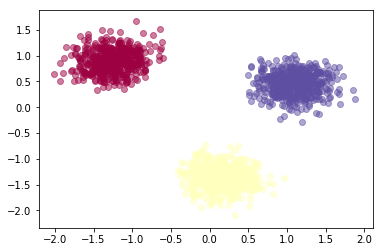

In [9]:
for k, col in zip(unique_labels,colors):
    if k ==-1:
        col ='k'
    class_member_mask = (labels == k)
    xy = x[class_member_mask & core_sample_mask]
    plt.scatter(xy[:,0],xy[:,1], color=col, marker=u'o', alpha=0.5)
    
    xy = x[class_member_mask &~core_sample_mask]
    plt.scatter(xy[:,0],xy[:,1], color=col, marker=u'o', alpha=0.5)

In [10]:
import csv
filename = 'weather-stations20140101-20141231.csv'
df = pd.read_csv(filename)
df.head(5)

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573


In [11]:
df = df[pd.notnull(df['Tm'])]
df = df.reset_index(drop=True)
df.head(5)

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573
4,ESQUIMALT HARBOUR,48.432,-123.439,BC,8.8,0.0,NaN,13.1,0.0,1.9,...,8.0,NaN,NaN,12.0,NaN,NaN,NaN,258.6,0.0,1012710


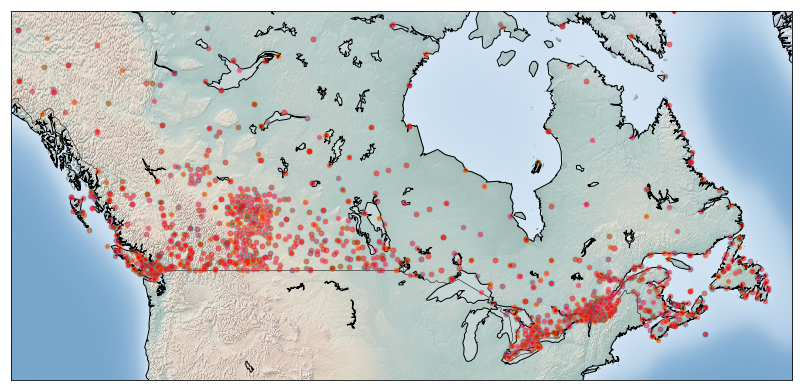

In [12]:
from mpl_toolkits.basemap import Basemap
from pylab import rcParams
rcParams['figure.figsize'] = (14,10)


llon = -140
ulon = -50
llat = 40
ulat = 65

df = df[(df['Long'] > llon) & (df['Long'] < ulon) & (df['Lat'] > llat) & (df['Lat'] < ulat)]

my_map = Basemap(projection='merc',
                resolution='l', area_thresh=1000.0,
                llcrnrlon = llon, llcrnrlat = llat,
                urcrnrlon = ulon, urcrnrlat = ulat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='white', alpha=0.3)
my_map.shadedrelief()

xs,ys = my_map(np.asarray(df.Long), np.asarray(df.Lat))
df['xm'] = xs.tolist()
df['ym'] = ys.tolist()

for index, row in df.iterrows():
    my_map.plot(row.xm, row.ym, markerfacecolor=([1,0,0]), marker='o',markersize=5, alpha=0.5)
plt.show()

In [14]:
import sklearn.utils
sklearn.utils.check_random_state(1000)

Clus_dataSet = df[['xm','ym']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

db = DBSCAN(eps=0.15, min_samples=10).fit(Clus_dataSet)
core_sample_mask = np.zeros_like(db.labels_, dtype=bool)
core_sample_mask[db.core_sample_indices_] = True
labels = db.labels_
df['Clus_Db'] = labels

realClusterNum = len(set(labels)) - (1 if -1 in labels else 0)
clusterNum=len(set(labels))

df[["Stn_Name","Tx","Tm","Clus_Db"]].head(5)

,Stn_Name,Tx,Tm,Clus_Db
0,CHEMAINUS,13.5,8.2,0
1,COWICHAN LAKE FORESTRY,15.0,7.0,0
2,LAKE COWICHAN,16.0,6.8,0
3,DUNCAN KELVIN CREEK,14.5,7.7,0
4,ESQUIMALT HARBOUR,13.1,8.8,0


Cluster0,Avg Temp :0.0
Cluster1,Avg Temp :1.0
Cluster2,Avg Temp :2.0
Cluster3,Avg Temp :3.0
Cluster4,Avg Temp :4.0


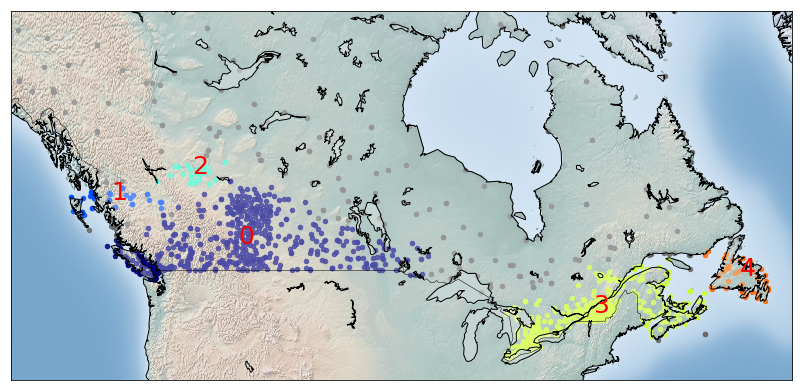

In [18]:
rcParams['figure.figsize'] = (14,10)

my_map = Basemap(projection='merc',
                resolution='l', area_thresh=1000.0,
                llcrnrlon=llon, llcrnrlat=llat,
                urcrnrlon=ulon, urcrnrlat=ulat)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='white', alpha=0.3)
my_map.shadedrelief()


colors = plt.get_cmap('jet')(np.linspace(0.0,1.0,clusterNum))

for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number ==-1 else colors[np.int(clust_number)])
    clus_Set = df[df.Clus_Db == clust_number]
    my_map.scatter(clus_Set.xm, clus_Set.ym, color=c, marker='o', s=20, alpha=0.85)
    
    if clust_number !=-1:
        cenx = np.mean(clus_Set.xm)
        ceny = np.mean(clus_Set.ym)
        plt.text(cenx,ceny, str(clust_number), fontsize=25, color='red')
        print('Cluster'+str(clust_number) +',Avg Temp :'+str(np.mean(clust_number)))


In [23]:
Clus_dataSet = df[['xm','ym','Tx','Tm','Tn']]
Clus_dataSet = np.nan_to_num(Clus_dataSet)
Clus_dataSet = StandardScaler().fit_transform(Clus_dataSet)

db = DBSCAN(eps=0.3, min_samples=10).fit(Clus_dataSet)
core_sample_mask = np.zeros_like(db.labels_,dtype=bool)
core_sample_mask[db.core_sample_indices_]=True
labels = db.labels_
df['Clus_Db'] = labels

realClusterNum = len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels))
df[["Stn_Name","Tx","Tm","Clus_Db"]].head(5)


,Stn_Name,Tx,Tm,Clus_Db
0,CHEMAINUS,13.5,8.2,0
1,COWICHAN LAKE FORESTRY,15.0,7.0,0
2,LAKE COWICHAN,16.0,6.8,0
3,DUNCAN KELVIN CREEK,14.5,7.7,0
4,ESQUIMALT HARBOUR,13.1,8.8,0


In [24]:
rcParams['figure.figsize']=(14,10)

my_map = Basemap(projection='merc',
                llcrnrlon=llon, llcrnrlat=llat,
                urcrnrlon=ulon, urcrnrlat=ulat)


my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='white', alpha=0.3)
my_map.shadedrelief()


colors = plt.get_cmap('jet')(np.linspace(0.0,1.0, clusterNum))

for clust_number in set(labels):
    c=(([0.4,0.4,0.4]) if clust_number ==-1 else colors[np.int(clust_number)])
    clus_Set = df[df.Clus_Db == clust_number]
    my_map.scatter(clus_Set.xm, clus_Set.ym,color=c, s=20, marker='o', alpha=0.85)
    if clust_number !=-1:
        cenx = np.mean(clus_Set.xm)
        ceny = np.mean(clus_Set.ym)
        plt.text(cenx, ceny,str(clust_number), fontsize=25,color='red')
        print('Cluster' +str(clust_number)+',Avg Tmep: '+str)